In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

resnet.summary()


n[0][0]          
__________________________________________________________________________________________________
conv3_block4_out (Activation)   (None, 28, 28, 512)  0           conv3_block4_add[0][0]           
__________________________________________________________________________________________________
conv4_block1_1_conv (Conv2D)    (None, 14, 14, 256)  131328      conv3_block4_out[0][0]           
__________________________________________________________________________________________________
conv4_block1_1_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_1_relu (Activation (None, 14, 14, 256)  0           conv4_block1_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block1_2_conv (Conv2D)    (None, 14, 14, 256)  590080      conv4_block1_1_relu[0][0] 

In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('Datasets/Train/*')

In [7]:
folders

['Datasets/Train/lamborghini',
 'Datasets/Train/mercedes',
 'Datasets/Train/tata',
 'Datasets/Train/hyundai',
 'Datasets/Train/audi',
 'Datasets/Train/mahindra']

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


0][0]           
__________________________________________________________________________________________________
conv4_block1_1_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_1_relu (Activation (None, 14, 14, 256)  0           conv4_block1_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block1_2_conv (Conv2D)    (None, 14, 14, 256)  590080      conv4_block1_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_block1_2_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_2_relu (Activation (None, 14, 14, 256)  0           conv4_block1_2_bn[0][0]    

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 164 images belonging to 6 classes.


In [14]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 122 images belonging to 6 classes.


In [ ]:
l

In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
6/6 [==============================] - 31s 5s/step - loss: 10.3279 - accuracy: 0.1585 - val_loss: 11.6202 - val_accuracy: 0.1721
Epoch 2/50
6/6 [==============================] - 20s 3s/step - loss: 11.7245 - accuracy: 0.1524 - val_loss: 3.8113 - val_accuracy: 0.1885
Epoch 3/50
6/6 [==============================] - 20s 3s/step - loss: 5.3653 - accuracy: 0.2378 - val_loss: 5.7709 - val_accuracy: 0.1639
Epoch 4/50
6/6 [==============================] - 21s 4s/step - loss: 4.7238 - accuracy: 0.2683 - val_loss: 3.2046 - val_accuracy: 0.2131
Epoch 5/50
6/6 [==============================] - 19s 3s/step - loss: 3.1055 - accuracy: 0.2744 - val_loss: 3.4652 - val_accuracy: 0.2623
Epoch 6/50
6/6 [==============================] - 19s 3s/step - loss: 4.1757 - accuracy: 0.3171 - val_loss: 5.9014 - val_accuracy: 0.1639
Epoch 7/50
6/6 [==============================] - 19s 3s/step - loss: 3.6285 - accuracy: 0.29

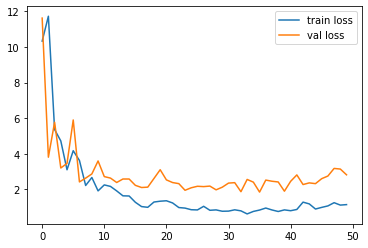

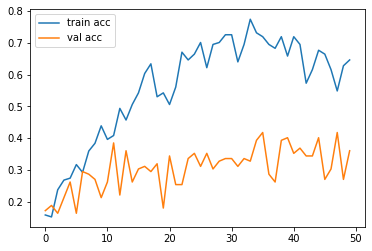

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [18]:

y_pred = model.predict(test_set)


In [19]:
y_pred

array([[5.32188900e-02, 3.96311343e-01, 9.83066186e-02, 4.27838502e-04,
        1.43615985e-02, 4.37373757e-01],
       [4.67511892e-01, 1.92603748e-02, 2.05830336e-01, 8.45630711e-05,
        2.73167372e-01, 3.41455117e-02],
       [1.74621642e-01, 3.98207940e-02, 7.43681848e-01, 1.37867341e-02,
        8.10885802e-03, 1.99800618e-02],
       [2.55797297e-01, 6.81169555e-02, 5.26531458e-01, 6.37629682e-06,
        5.23343030e-03, 1.44314483e-01],
       [4.30043012e-01, 2.00057238e-01, 1.80622250e-01, 1.17471551e-04,
        5.20428233e-02, 1.37117326e-01],
       [8.22281659e-01, 1.37762334e-02, 1.15609095e-01, 1.05636318e-04,
        2.55801249e-02, 2.26472430e-02],
       [2.59013083e-02, 9.79345664e-03, 7.95759916e-01, 1.70977000e-05,
        8.56069326e-02, 8.29212740e-02],
       [1.98787674e-02, 1.21506909e-03, 9.45854306e-01, 2.38966180e-08,
        5.40331844e-03, 2.76485160e-02],
       [8.16400588e-01, 7.39359297e-03, 1.17689498e-01, 1.27985171e-04,
        3.84992324e-02, 

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([5, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 4, 0, 2, 2, 4, 5, 2, 2, 2, 1, 5,
       4, 4, 2, 5, 2, 1, 5, 0, 2, 1, 2, 5, 4, 1, 0, 2, 0, 0, 2, 0, 2, 0,
       1, 5, 2, 1, 1, 5, 5, 2, 1, 0, 0, 0, 0, 5, 2, 0, 0, 0, 2, 0, 2, 5,
       2, 0, 5, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 4, 0, 1,
       5, 2, 1, 2, 4, 5, 4, 1, 0, 2, 2, 1, 2, 2, 4, 5, 2, 5, 4, 5, 2, 0,
       2, 1, 2, 5, 2, 4, 2, 2, 4, 5, 0, 2])

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('model_resnet50.h5')

In [24]:
img_data 

NameError: name 'img_data' is not defined

In [34]:
img=image.load_img('Datasets/Test/hyundai/2.jpg',target_size=(224,224))



In [ ]:
asdfzxcvzxcvqwerasdfzxcv

In [26]:
x=image.img_to_array(img)
x

NameError: name 'img' is not defined

In [27]:
x.shape

TensorShape([None, 100352])

In [28]:
x=x/255

In [29]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

NotImplementedError: Cannot convert a symbolic Tensor (RealDiv:0) to a numpy array.

In [30]:
model.predict(img_data)

NameError: name 'img_data' is not defined

In [31]:
a=np.argmax(model.predict(img_data), axis=1)

NameError: name 'img_data' is not defined

In [32]:
a==1

NameError: name 'a' is not defined